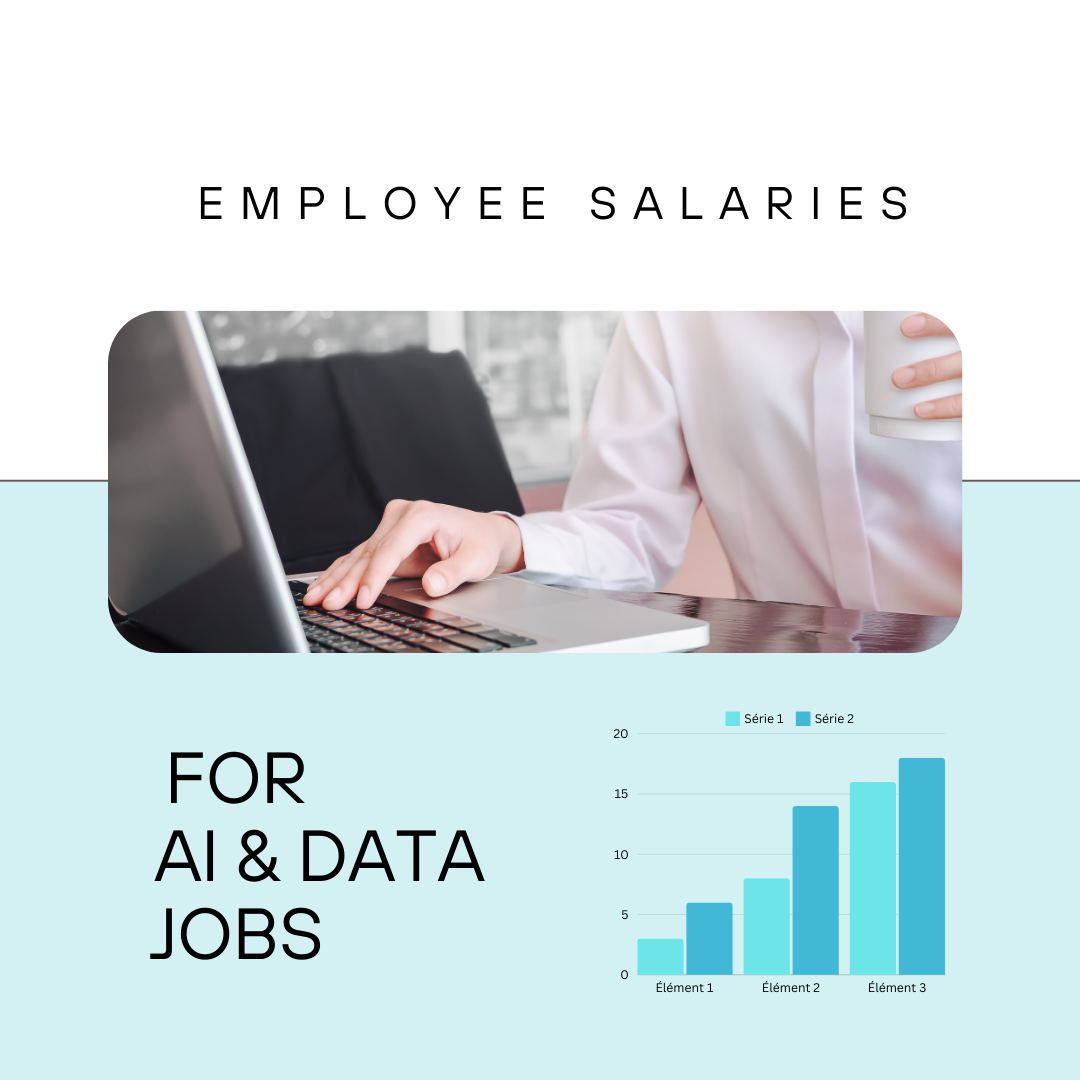

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/employee-salaries-for-different-job-roles/ds_salaries.csv


In [2]:
# Reading data

df=pd.read_csv(r'/kaggle/input/employee-salaries-for-different-job-roles/ds_salaries.csv')

In [3]:
# Top 5 rows of the data

df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# Shape of the data

df.shape

(607, 12)

In [5]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [6]:
# Removing column

df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
# Listing columns

df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
# Calculating null values in dataset

df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
# Calculating unique values in dataset

df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [10]:
# Summary of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [11]:
# Statistical summary of data

df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [12]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [13]:
# Calculating yearwise number of records

df.work_year.value_counts()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

In [14]:
# Value counts per experience level

df.experience_level.value_counts()

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [15]:
# Value counts per remote ratio

df.remote_ratio.value_counts()

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [16]:
# Value counts per company size

df.company_size.value_counts()

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [17]:
 pd.set_option('display.max_rows', None)

In [18]:
# Number of jobs per job title categorised by employment type

df.groupby('employment_type')['job_title'].value_counts().to_frame()

count
employment_type job_title                                      
CT              Applied Machine Learning Scientist            1
                Business Data Analyst                         1
                ML Engineer                                   1
                Principal Data Scientist                      1
                Staff Data Scientist                          1
FL              Computer Vision Engineer                      1
                Data Engineer                                 1
                Data Scientist                                1
                Machine Learning Scientist                    1
FT              Data Scientist                              140
                Data Engineer                               129
                Data Analyst                                 96
                Machine Learning Engineer                    41
                Research Scientist                           16
                Data Science Manager                         12
                Data Architect                               11
                Big Data Engineer                             8
                Data Analytics Manager                        7
                Data Science Consultant                       7
                Director of Data Science                      7
                Machine Learning Scientist                    7
                BI Data Analyst                               6
                Lead Data Engineer                            6
                Principal Data Scientist                      6
                AI Scientist                                  5
                Applied Data Scientist                        5
                Data Engineering Manager                      5
                Head of Data                                  5
                Analytics Engineer                            4
                Business Data Analyst                         4
                Computer Vision Engineer                      4
                Data Analytics Engineer                       4
                Head of Data Science                          4
                ML Engineer                                   4
                Applied Machine Learning Scientist            3
                Computer Vision Software Engineer             3
                Data Science Engineer                         3
                Lead Data Analyst                             3
                Lead Data Scientist                           3
                Machine Learning Developer                    3
                Machine Learning Infrastructure Engineer      3
                Principal Data Engineer                       3
                Cloud Data Engineer                           2
                Director of Data Engineering                  2
                ETL Developer                                 2
                Financial Data Analyst                        2
                Principal Data Analyst                        2
                Product Data Analyst                          2
                Big Data Architect                            1
                Data Analytics Lead                           1
                Data Specialist                               1
                Finance Data Analyst                          1
                Head of Machine Learning                      1
                Lead Machine Learning Engineer                1
                Machine Learning Manager                      1
                Marketing Data Analyst                        1
                NLP Engineer                                  1
PT              AI Scientist                                  2
                Data Engineer                                 2
                Data Scientist                                2
                3D Computer Vision Researcher                 1
                Computer V

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [20]:
# Doughnut chart

fig = go.Figure()
fig.add_trace(go.Pie(values= [326,198,83],title = 'Overtime X Attrition', labels=['M','L','S'], hole=0.5))

fig.update_layout(autosize=False, width=500, height=450)
fig.show()

In [21]:
# Average salary per job title

df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

job_title
Data Analytics Lead                         405000.000000
Principal Data Engineer                     328333.333333
Financial Data Analyst                      275000.000000
Principal Data Scientist                    215242.428571
Director of Data Science                    195074.000000
Data Architect                              177873.909091
Applied Data Scientist                      175655.000000
Analytics Engineer                          175000.000000
Data Specialist                             165000.000000
Head of Data                                160162.600000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Applied Machine Learning Scientist          142068.750000
Lead Data Engineer                          139724.500000
Data Analytics Manager                      127134.285714
Clou

In [22]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

<Axes: xlabel='salary_currency', ylabel='count'>

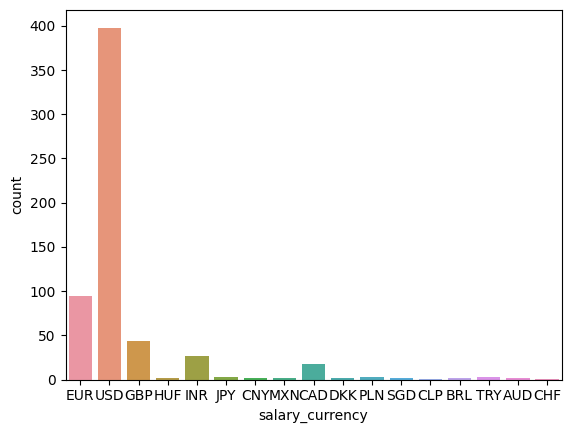

In [23]:
# Number of companies per currency(payout)

sns.countplot(df,x='salary_currency')

<Axes: xlabel='work_year', ylabel='count'>

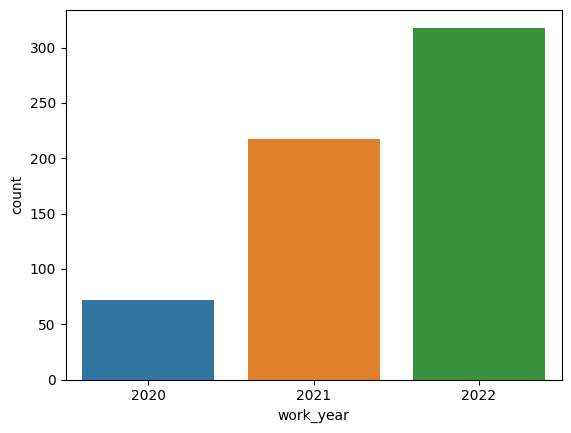

In [24]:
# Countplot for work year

sns.countplot(df,x='work_year')

<Axes: xlabel='experience_level', ylabel='count'>

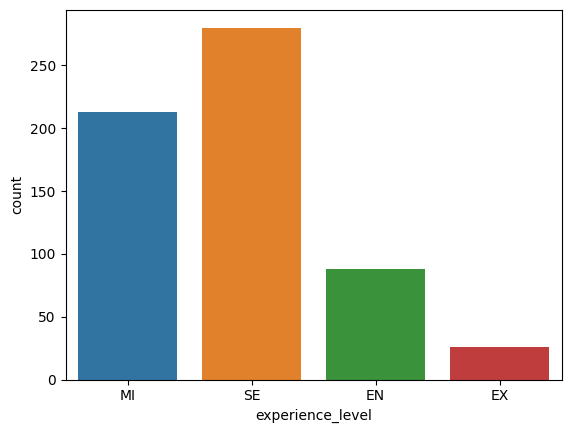

In [25]:
# Number of companies per experience level

sns.countplot(df,x='experience_level')

<Axes: xlabel='employment_type', ylabel='count'>

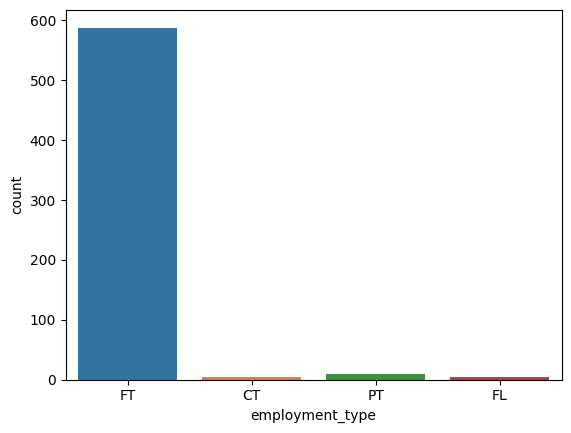

In [26]:
# Number of companies per employment type

sns.countplot(df,x='employment_type')

<Axes: xlabel='remote_ratio', ylabel='count'>

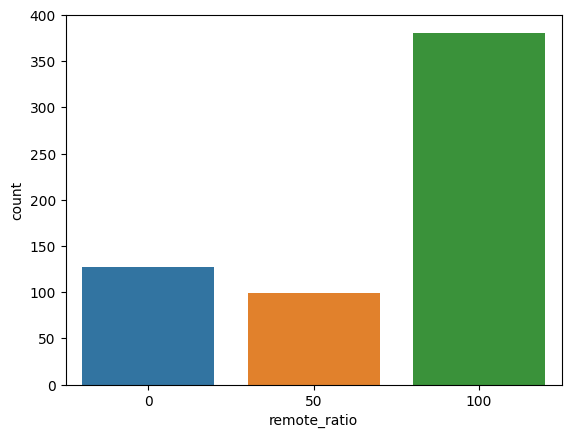

In [27]:
# Number of companies per remote ratio

sns.countplot(df,x='remote_ratio')

<Axes: xlabel='company_size', ylabel='count'>

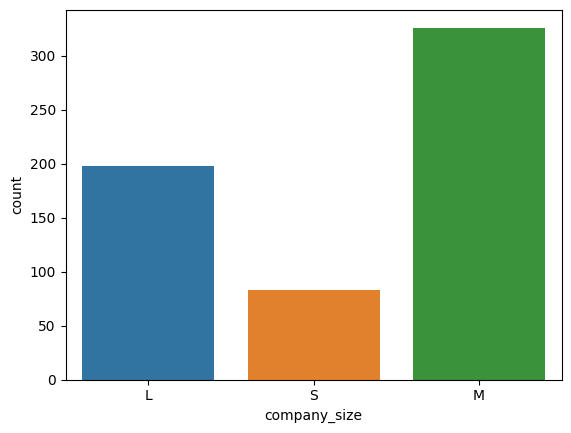

In [28]:
# Number of companies per company size

sns.countplot(df,x='company_size')

In [29]:
pd.reset_option('display.max_rows')

In [30]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

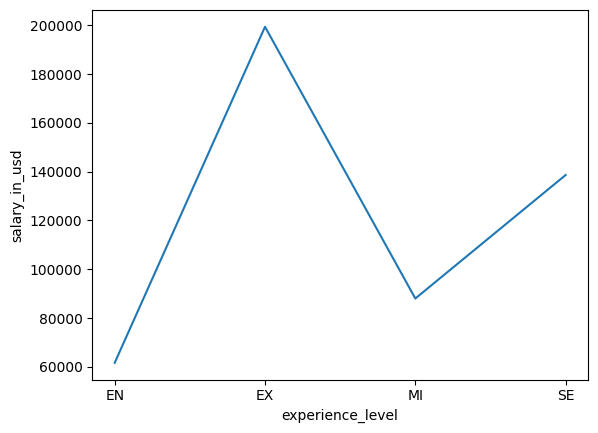

In [31]:
# Average salary per experience level

fd=df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
sns.lineplot(fd,x='experience_level',y='salary_in_usd')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='company_size', ylabel='salary_in_usd'>

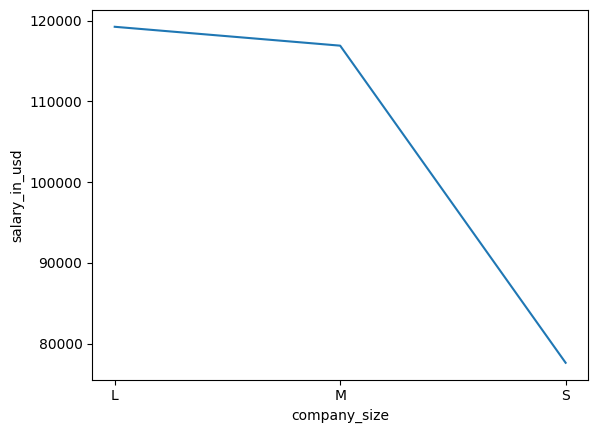

In [32]:
# Average salary per company size

fd=df.groupby('company_size')['salary_in_usd'].mean().reset_index()
sns.lineplot(fd,x='company_size',y='salary_in_usd')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

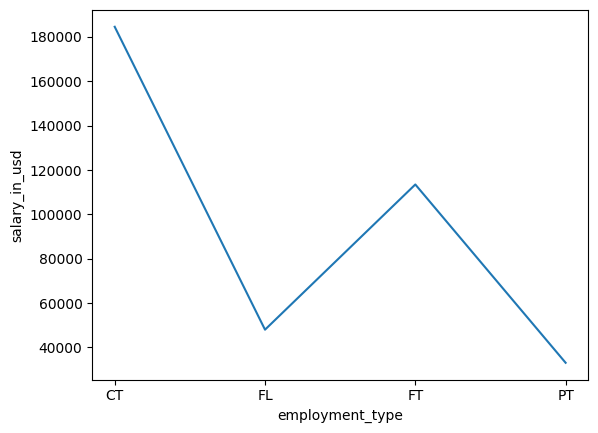

In [33]:
# Average salary per employment type

fd=df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
sns.lineplot(fd,x='employment_type',y='salary_in_usd')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

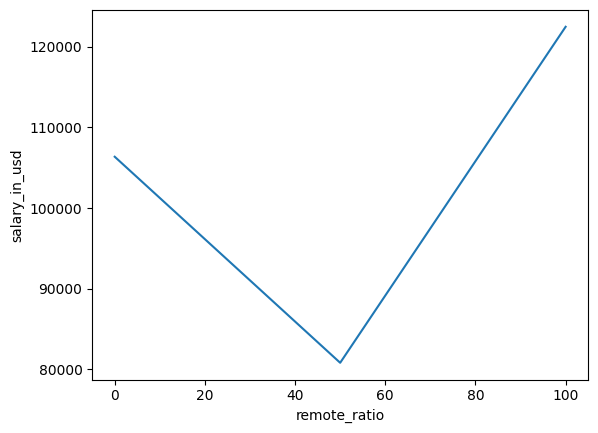

In [34]:
# Average salary per remote ratio

fd=df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()
sns.lineplot(fd,x='remote_ratio',y='salary_in_usd')

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

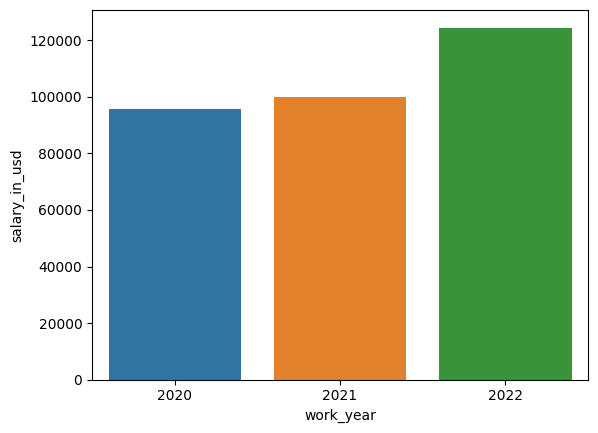

In [35]:
# Average salary per work year

fd=df.groupby('work_year')['salary_in_usd'].mean().reset_index()
sns.barplot(fd,x='work_year',y='salary_in_usd')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='salary_in_usd', ylabel='job_title'>

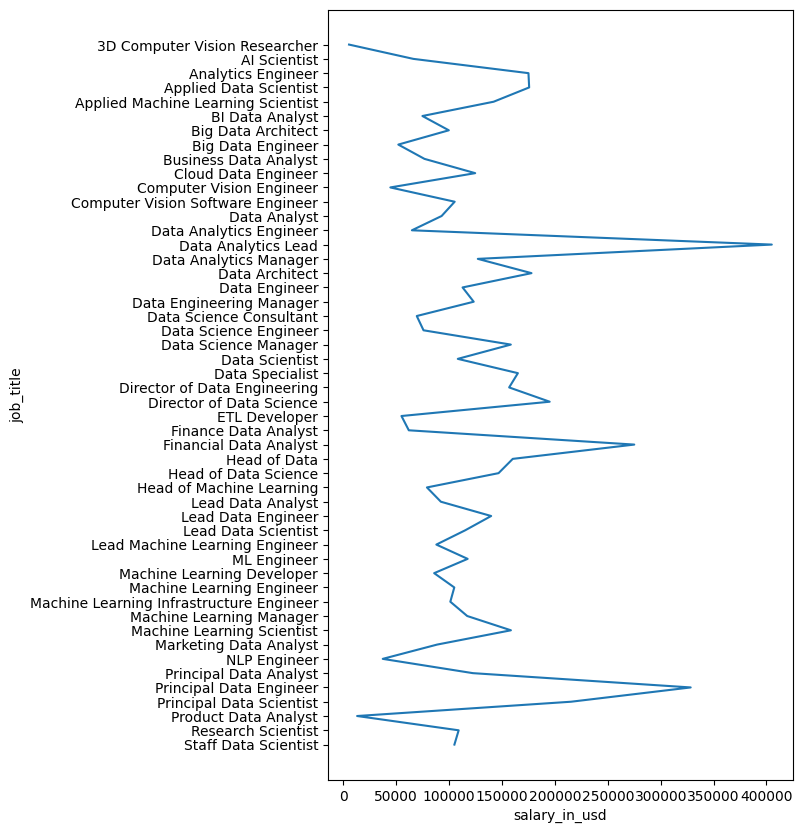

In [36]:
# Average salary per job type

fd=df.groupby('job_title')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(6,10))
sns.lineplot(fd,x='salary_in_usd',y='job_title',orient='y')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



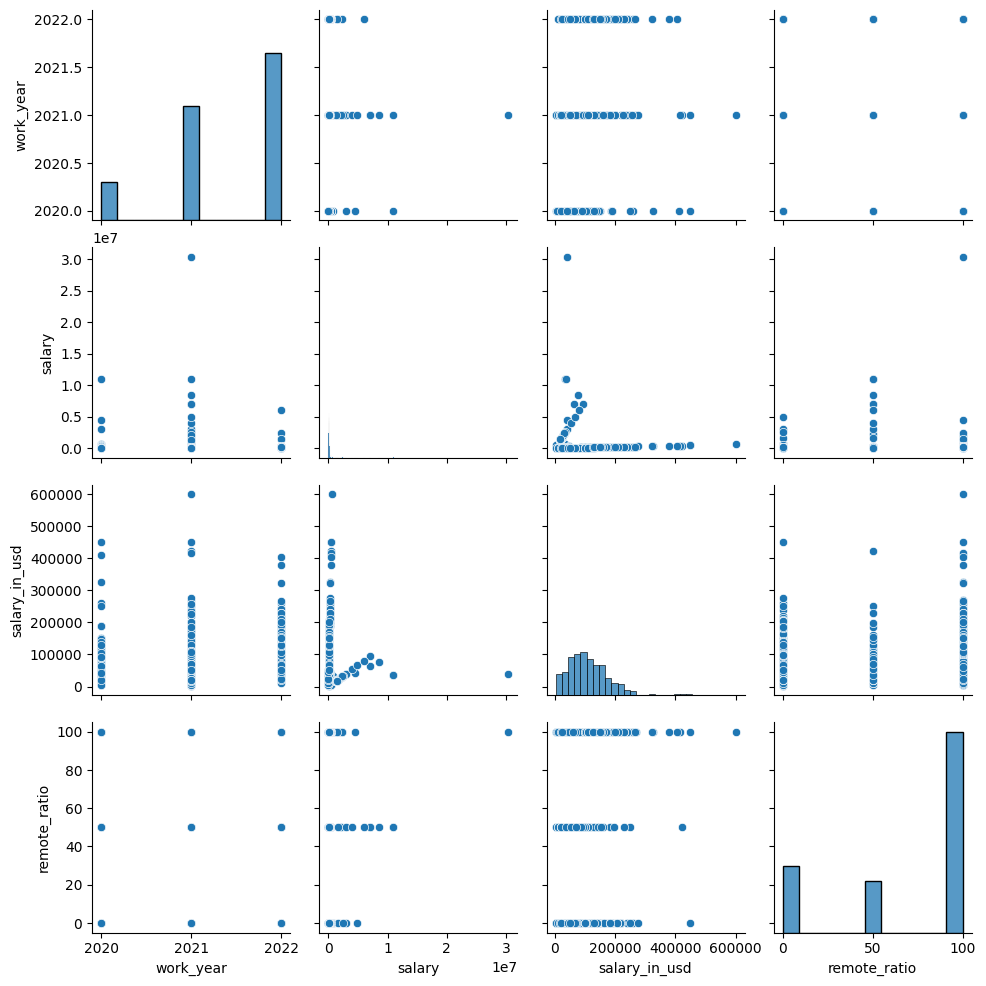

In [37]:
sns.pairplot(df)

# ML model

In [38]:
x=df.drop(['salary','salary_in_usd'],axis=1)

In [39]:
y=df['salary_in_usd']

<Axes: >

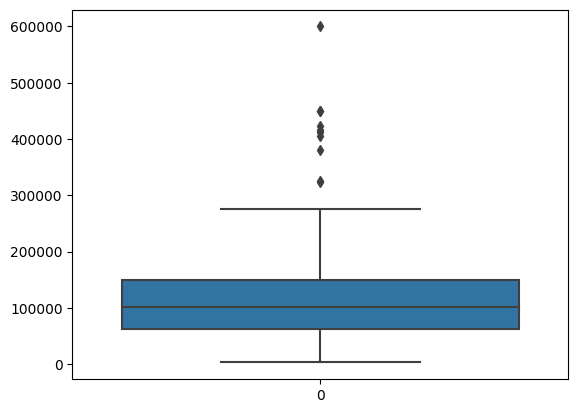

In [40]:
sns.boxplot(y)

In [41]:
cat_col=df.select_dtypes(include='object').columns.tolist()

In [42]:
cat_col

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [43]:
df2=pd.get_dummies(df,dtype=float)

In [44]:
df2

,work_year,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,2020,70000,79833,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,260000,260000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2020,85000,109024,50,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,20000,20000,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2020,150000,150000,50,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,154000,100,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
603,2022,126000,126000,100,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
604,2022,129000,129000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
605,2022,150000,150000,100,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=2)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [48]:
x_train=sc.fit_transform(x_train)

In [49]:
x_test=sc.transform(x_test)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
reg=LinearRegression()

In [52]:
reg.fit(x_train,y_train)

LinearRegression()

In [53]:
y_pred=reg.predict(x_test)

In [54]:
y_pred

array([ 69336.        , 132320.        , 135000.        ,  31615.        ,
        49646.        , 106139.36207273, 213120.        , 260000.        ,
        82653.94296617, 164000.        , 104890.        , 123000.        ,
        39263.        ,  82528.        ,  81666.        ,  84900.        ,
        33808.        ,  28016.        , 111775.        ,  50000.        ,
        52396.        , 145000.        ,  90320.        ,   4773.80482168,
        20000.        , 147800.        ,  62726.        , 116914.        ,
       190200.        , 183600.        ,  73148.20919202,  22611.        ,
        31825.94296617,  63711.        , 159000.        , 220000.        ,
       240000.        , 110037.        , 105000.        , 200000.        ,
        58000.        ,  50000.        , 148261.        ,  59693.10193202,
        79197.        , 164300.3099327 , 150000.        , 160000.        ,
       220110.        ,  41689.        , 161342.        , 150000.        ,
        84638.15355436,  

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

# R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 1020.60
Mean Squared Error: 20338285.84
Root Mean Squared Error: 4509.80
R-squared: 0.9949247083631828


The linear regression model predicts salary on various features of the job (experience level, company size, employment type, etc.). The high R-squared value and relatively low errors suggest that the model is performing well in predicting salaries.